### Tensorflow tutorial (binary classification)

In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255
X_test = X_test/255

In [20]:
len(X_train)

60000

In [21]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

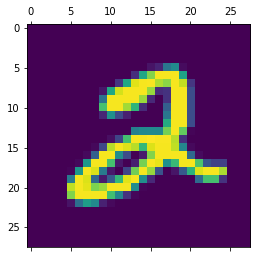

In [22]:
plt.matshow(X_train[5])

In [23]:
y_train[5]

2

In [24]:
import pandas as pd
flatten = X_train.reshape(len(X_train), 28*28)
test_flatten = X_test.reshape(len(X_test), 28*28)
flatten.shape

(60000, 784)

Create Simple Neural Network

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation ='sigmoid')

])
model.compile(optimizer = 'adam', 
loss = 'sparse_categorical_crossentropy', 
metrics = ['accuracy'])
model.fit(flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4690 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2737 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2666 - accuracy: 0.9258


In [26]:
model.evaluate(test_flatten, y_test)

313/313 [==============================] - 3s 1ms/step - loss: 0.2682 - accuracy: 0.9259


[0.2682456076145172, 0.9258999824523926]

In [30]:
y_pred = model.predict(test_flatten)
y_pred[1]

313/313 [==============================] - 0s 934us/step


array([4.8986477e-01, 4.7578006e-03, 9.9916911e-01, 3.8699132e-01,
       6.8015932e-10, 7.9819095e-01, 8.1219894e-01, 7.5184488e-13,
       1.7867294e-01, 1.8224622e-09], dtype=float32)

In [31]:
np.argmax(y_pred[1])

2

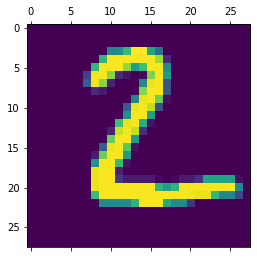

In [33]:
plt.matshow(X_test[1])

In [34]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [35]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    6,    2,    1,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    8,  922,   17,    9,    3,   13,    8,   42,    4],
       [   3,    0,   15,  924,    0,   19,    2,   10,   26,   11],
       [   1,    1,    2,    1,  911,    0,   13,    4,   10,   39],
       [  10,    3,    2,   37,   11,  755,   16,    8,   43,    7],
       [  11,    3,    5,    1,    7,   10,  916,    2,    3,    0],
       [   1,    6,   25,    5,   10,    0,    0,  931,    3,   47],
       [   5,    5,    6,   15,    9,   16,    9,    7,  895,    7],
       [  10,    7,    1,    8,   23,    4,    0,   15,    9,  932]])>

Text(69.0, 0.5, 'Truth')

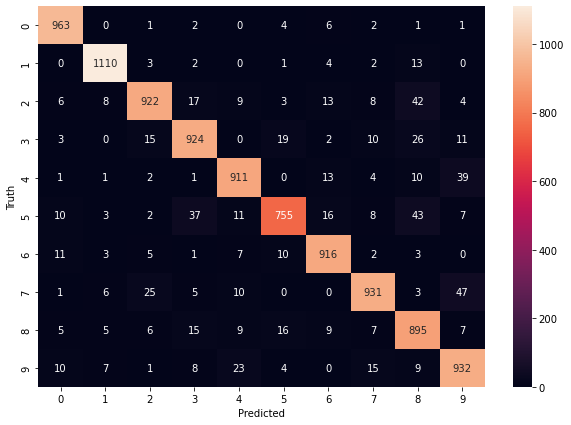

In [36]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Add hidden layer

In [42]:


from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation ='relu'),
    keras.layers.Dense(10,  activation ='sigmoid') 
])
model.compile(optimizer = 'adam', 
loss = 'sparse_categorical_crossentropy', 
metrics = ['accuracy']
)
model.fit(flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2692 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1230 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0516 - accuracy: 0.9839


In [43]:
model.evaluate(test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0844 - accuracy: 0.9731


[0.08436065167188644, 0.9731000065803528]

Text(69.0, 0.5, 'Truth')

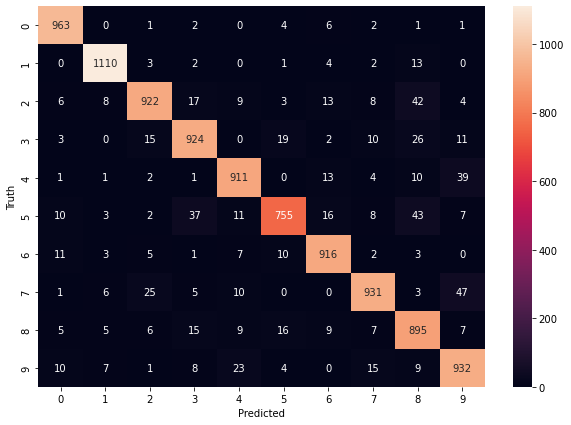

In [44]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Supply without flattening

In [45]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation ='relu'),
    keras.layers.Dense(10,  activation ='sigmoid') 
])
model.compile(optimizer = 'adam', 
loss = 'sparse_categorical_crossentropy', 
metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2688 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0860 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0507 - accuracy: 0.9843


Tryin for different loss and optimizer

In [51]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation ='relu'),
    keras.layers.Dense(10,  activation ='sigmoid') 
])
model.compile(optimizer = 'adam', 
loss = 'poisson', 
metrics = ['accuracy']
)
#low accuracy for poisson in this case 
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0115 - accuracy: 0.1035
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.1053
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.1027
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.1008
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0000 - accuracy: 0.1001


In [52]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation ='relu'),
    keras.layers.Dense(10,  activation ='sigmoid') 
])
model.compile(optimizer = 'adam', 
loss = 'kl_divergence', 
metrics = ['accuracy']
)
#kl_divergenc doesn't really fit well in this case either
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.1623
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.9527e-05 - accuracy: 0.1658
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6837e-06 - accuracy: 0.1426
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.6491e-07 - accuracy: 0.1259
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: -8.2131e-07 - accuracy: 0.1147


In [60]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation ='relu'),
    keras.layers.Dense(10,  activation ='sigmoid') 
])
model.compile(optimizer = 'Adamax', 
loss = 'sparse_categorical_crossentropy', 
metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3853 - accuracy: 0.8980
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2132 - accuracy: 0.9409
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1701 - accuracy: 0.9518
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1445 - accuracy: 0.9595
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1258 - accuracy: 0.9650


In [61]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, input_shape = (784,), activation ='relu'),
    keras.layers.Dense(10,  activation ='sigmoid') 
])
model.compile(optimizer = 'Nadam', 
loss = 'sparse_categorical_crossentropy', 
metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2750 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9833


In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9737


[0.08816317468881607, 0.9736999869346619]